In [96]:
import numpy as np
import pandas as pd

In [97]:
df = pd.read_table('C:\Santhosh\AIML\Github\ML-data-preprocessing\data\Test_u94Q5KV.txt', delimiter=",", names=('Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'))

In [98]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,10007.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,870.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [99]:
df.shape

(5681, 11)

In [100]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [101]:
import numpy as np
import matplotlib.pyplot as plt
anomalies = []

data = df['Item_MRP']

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            print(outlier)
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

-292.3127991483375
578.1203035313686
10007.8622
870.3198


[10007.8622, 870.3198]

In [102]:
from sklearn.cluster import DBSCAN
data = df['Item_MRP']
data = data.values.reshape(-1,1)


outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

2

In [111]:
from sklearn.ensemble import IsolationForest
data = df['Item_MRP']
data = data.values.reshape(-1,1)

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data)
preds

ValueError: could not convert string to float: 'FDW58'

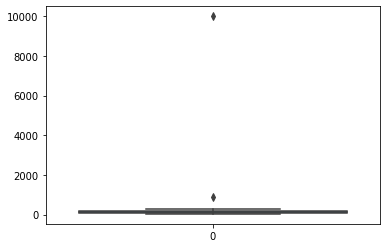

In [109]:
import seaborn as sns
sns.boxplot(data=data)